In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('ifood_df (2).csv')

In [ ]:
print("Initial Data Exploration:")
df.head()
df.info()
df.describe()
df.columns.tolist()

Initial Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  


['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

In [ ]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("Dropped 'ID' column.")
else:
    print("'ID' column not found, skipping drop.")

print("Columns after dropping 'ID' (if applicable):", df.columns.tolist())


'ID' column not found, skipping drop.
Columns after dropping 'ID' (if applicable): ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # Check if the column is numerical before filling with median
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].fillna(df[column].median())
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.columns.tolist()

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

In [ ]:
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
    df.dropna(subset=['Dt_Customer'], inplace=True) # Drop rows where date conversion failed
    df['Customer_Tenure'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days
    print("Successfully processed 'Dt_Customer' and calculated 'Customer_Tenure'.")
else:
    print("'Dt_Customer' column not found after one-hot encoding. Skipping date conversion and tenure calculation.")
    df['Customer_Tenure'] = 0


'Dt_Customer' column not found after one-hot encoding. Skipping date conversion and tenure calculation.


In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Customer_Tenure
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.0
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,0.0
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.0
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,0.0
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,0.0
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,0.0
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,0.0



Correlation Matrix:


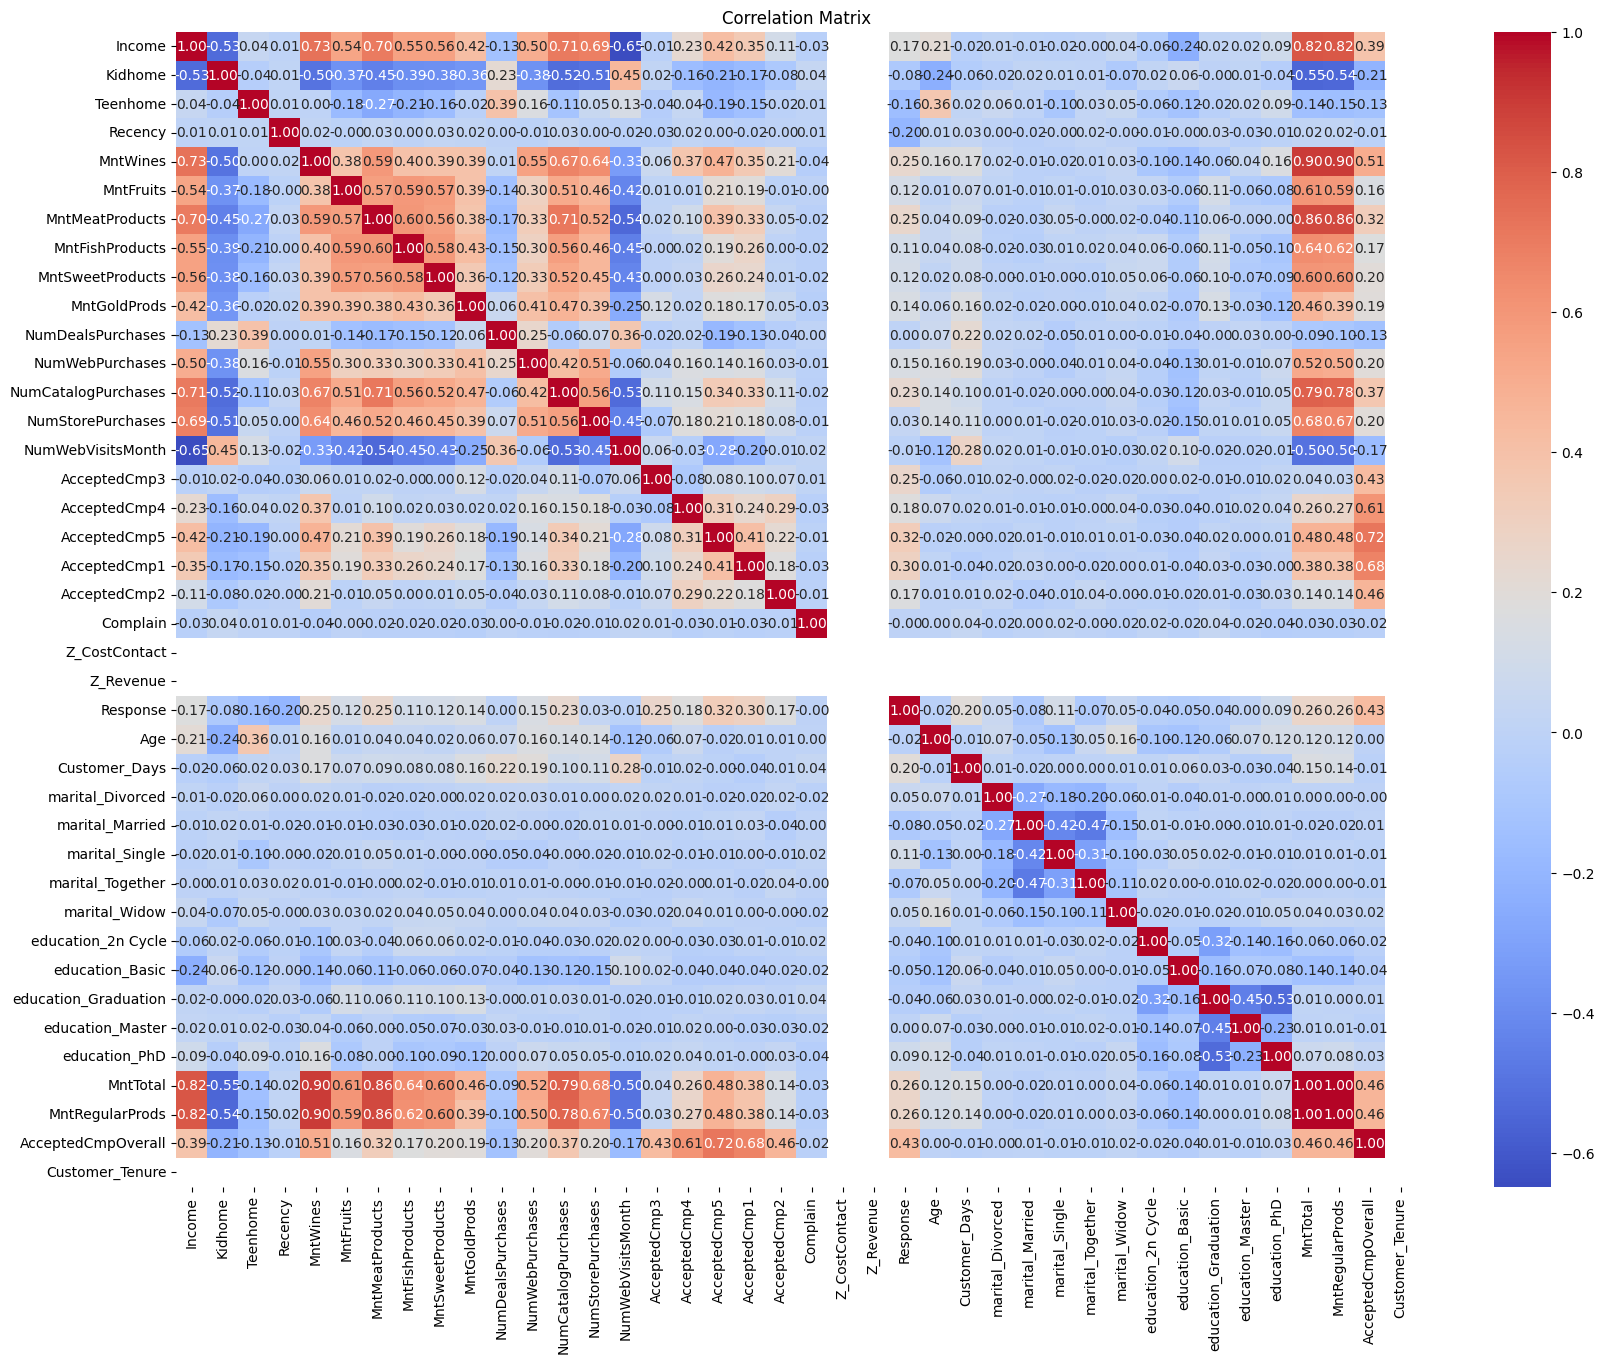

In [ ]:
print("\nCorrelation Matrix:")
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

In [ ]:
# Total spending
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Total purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Average spent per purchase (handle division by zero)
df['Avg_Spent_Per_Purchase'] = df.apply(lambda row: row['Total_Spending'] / row['Total_Purchases'] if row['Total_Purchases'] != 0 else 0, axis=1)

# Has Children
df['Has_Children'] = ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int)

In [ ]:
df['Living_with_Partner'] = 0
if 'Marital_Status_Married' in df.columns:
    df['Living_with_Partner'] = df['Marital_Status_Married']
if 'Marital_Status_Together' in df.columns:
    df['Living_with_Partner'] = df['Living_with_Partner'] | df['Marital_Status_Together']
df['Living_with_Partner'] = df['Living_with_Partner'].astype(int)

In [ ]:
features_for_segmentation = [
    'Income', 'Customer_Tenure', 'Recency', 'Total_Spending', 'Total_Purchases',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response',
    'Avg_Spent_Per_Purchase', 'Has_Children', 'Living_with_Partner'
]

In [ ]:
existing_features = [col for col in features_for_segmentation if col in df.columns]
missing_features = [col for col in features_for_segmentation if col not in df.columns]

In [ ]:
if missing_features:
    print(f"Warning: The following features for segmentation are missing from the DataFrame: {missing_features}")
    # Remove missing features from the list of features to be used for segmentation
    features_for_segmentation = existing_features

df_segmentation = df[features_for_segmentation].copy()

In [ ]:
df_segmentation.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_segmentation)

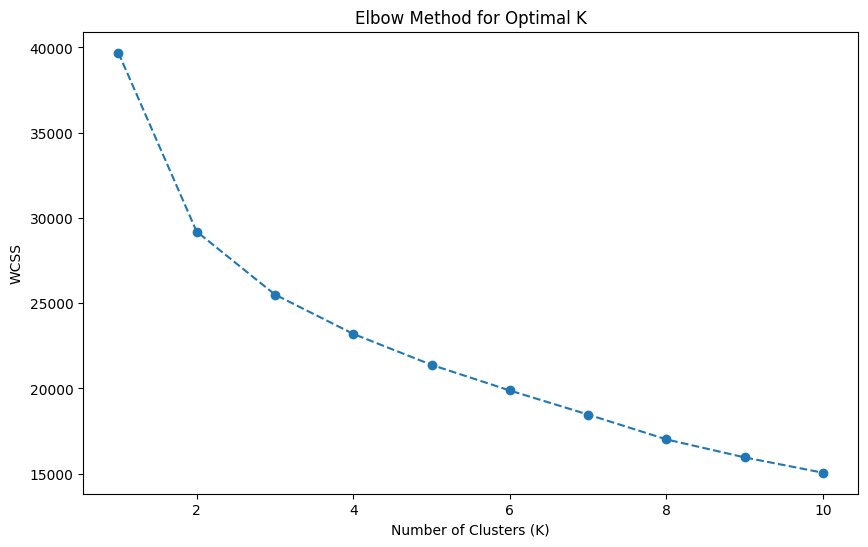

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()


In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df_segmentation['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
df = df.loc[df_segmentation.index]
df['Cluster'] = df_segmentation['Cluster']

In [ ]:
cluster_profiles = df.groupby('Cluster')[features_for_segmentation].mean()
print("\nCluster Profiles (Mean values for each feature per cluster):")
print(cluster_profiles)


Cluster Profiles (Mean values for each feature per cluster):
               Income  Customer_Tenure    Recency  Total_Spending  \
Cluster                                                             
0        71054.833333              0.0  48.666667     1307.666667   
1        58594.640762              0.0  47.819648      758.400293   
2        77046.650728              0.0  49.887734     1423.264033   
3        34262.934783              0.0  49.403162       95.842885   

         Total_Purchases  NumDealsPurchases  NumWebPurchases  \
Cluster                                                        
0              19.933333           1.700000         4.900000   
1              21.460411           3.749267         6.480938   
2              20.168399           1.062370         4.918919   
3               7.799407           1.969368         2.083992   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Cluster                                                             

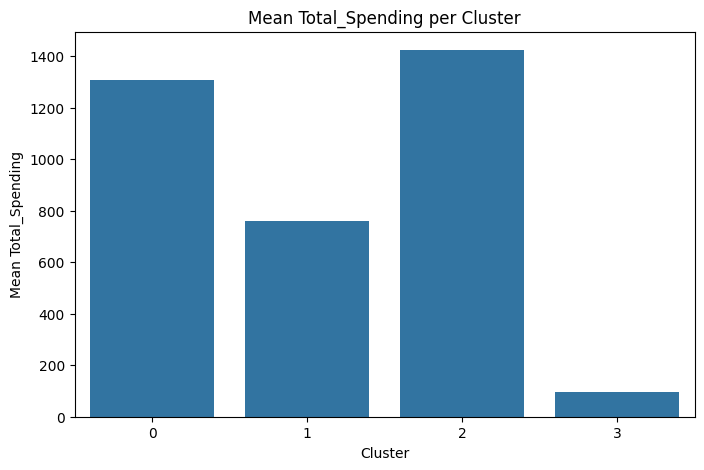

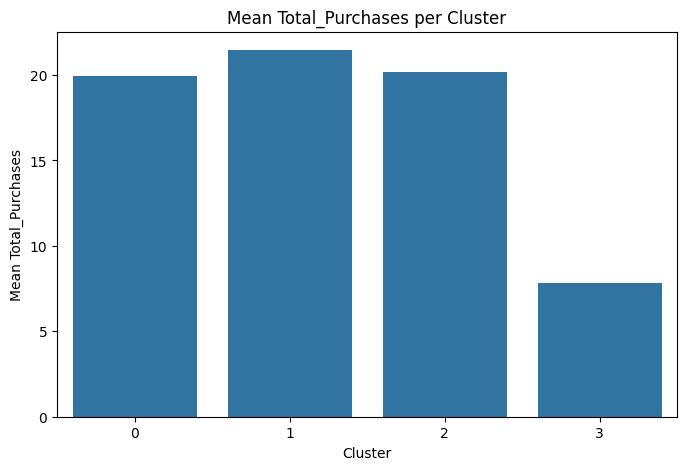

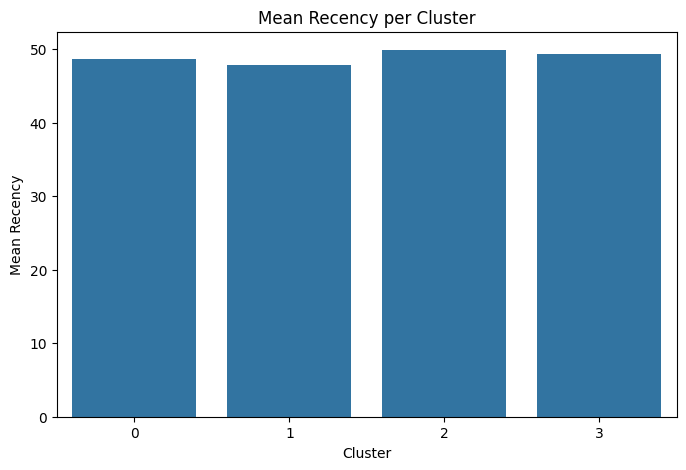

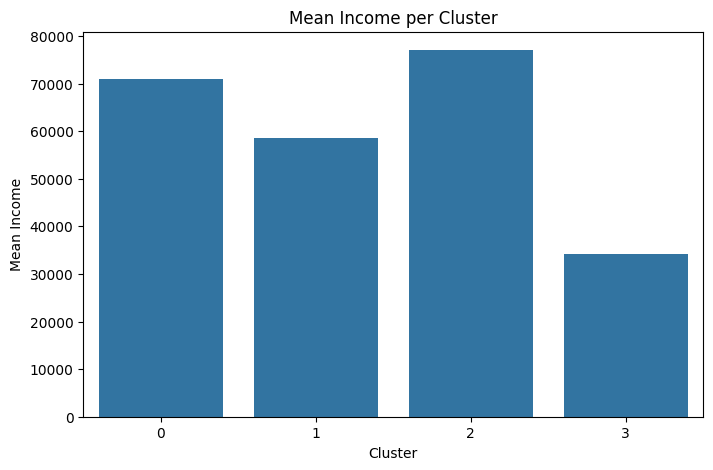

In [ ]:
for feature in ['Total_Spending', 'Total_Purchases', 'Recency', 'Income']:
    if feature in cluster_profiles.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature])
        plt.title(f'Mean {feature} per Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(f'Mean {feature}')
        plt.savefig(f'mean_{feature}_per_cluster.png')
        plt.show()
    else:
        print(f"'{feature}' not found in cluster profiles, skipping visualization.")

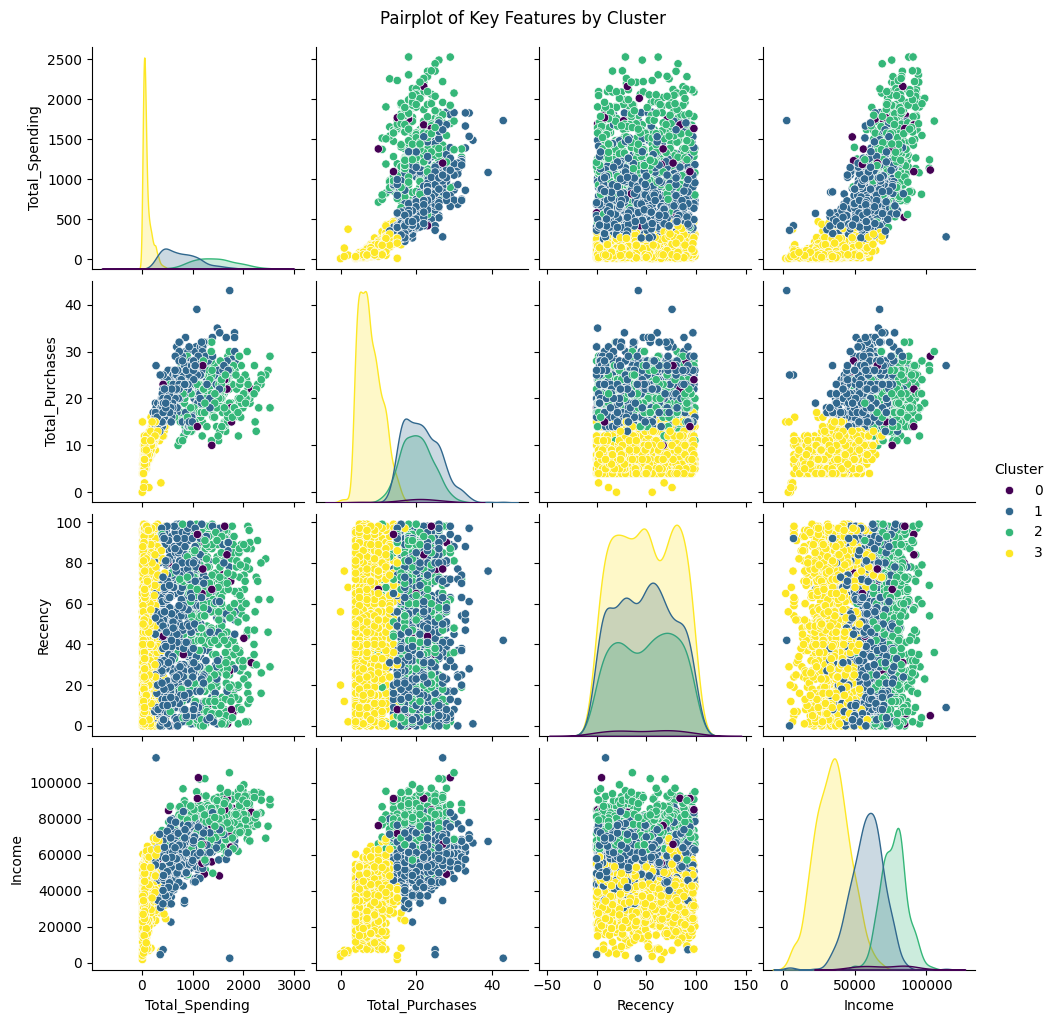

In [ ]:
pairplot_features = [f for f in ['Total_Spending', 'Total_Purchases', 'Recency', 'Income'] if f in df_segmentation.columns]
if pairplot_features:
    sns.pairplot(df_segmentation, vars=pairplot_features, hue='Cluster', palette='viridis')
    plt.suptitle('Pairplot of Key Features by Cluster', y=1.02)
    plt.savefig('pairplot_clusters.png')
    plt.show()
else:
    print("No common features found for pairplot.")

df.to_csv('ifood_df_segmented.csv', index=False)